## Arguments

#### Logistic Growth
- prophet allows us to use logistic growth algorithm.  
- in order to use growth argument, you need to set `carrying capacity` and `floor`.  

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')

# df['cap'] = 8.5
# df['floor'] = 1.5

#### Change Point Detection



In [2]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

model = Prophet(growth='linear')
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

c:\Users\Youyoung\Documents\awesome-timeseries-forecasting\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
21:26:29 - cmdstanpy - INFO - Chain [1] start processing
21:26:29 - cmdstanpy - INFO - Chain [1] done processing


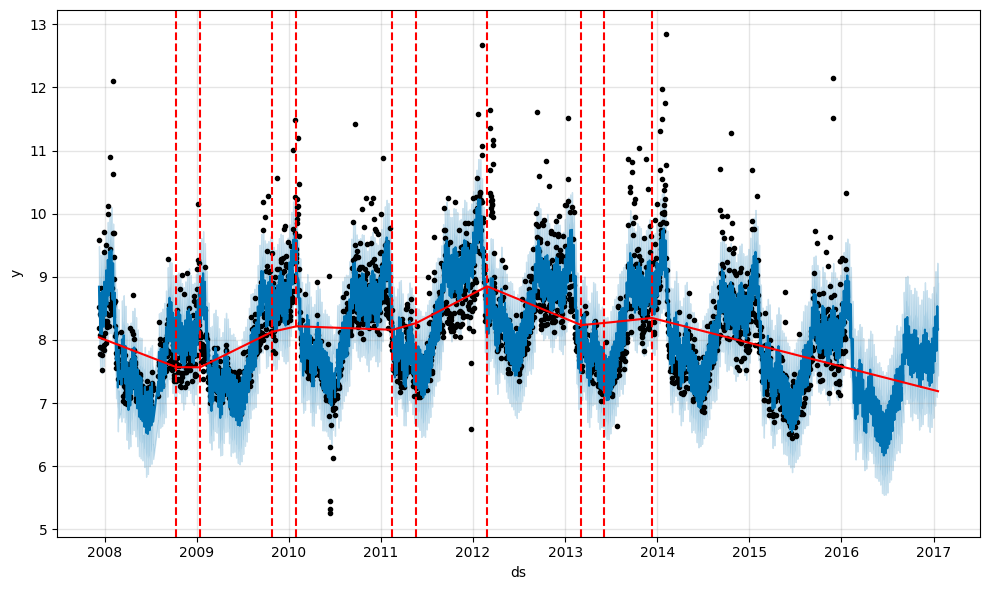

In [3]:
# detect change points automatically
fig = model.plot(forecast)
add = add_changepoints_to_plot(fig.gca(), model, forecast)

23:07:59 - cmdstanpy - INFO - Chain [1] start processing
23:07:59 - cmdstanpy - INFO - Chain [1] done processing


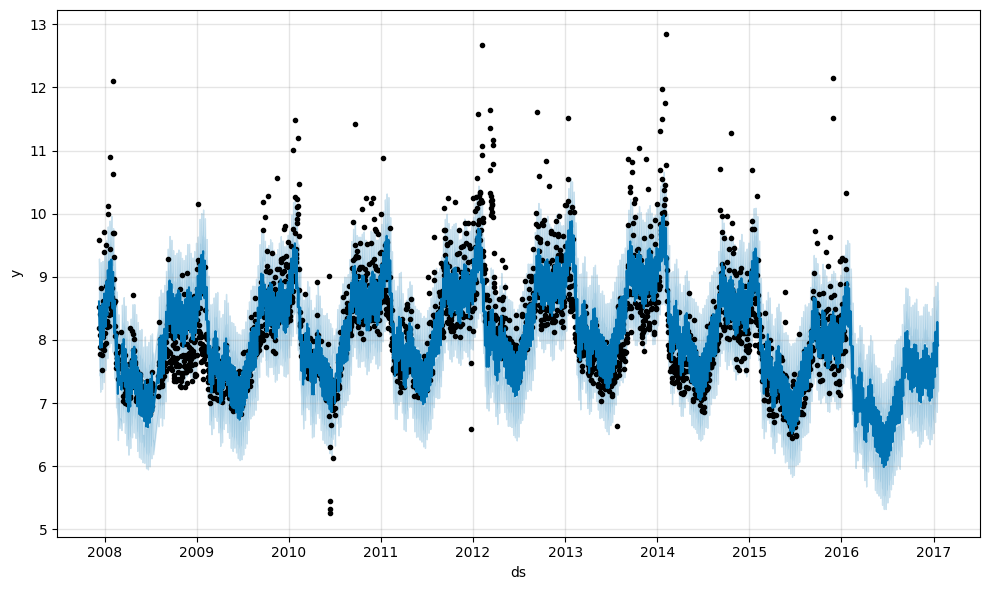

In [4]:
# or you can just specify change points manually
model = Prophet(changepoints=['2014-01-01'])
forecast = model.fit(df).predict(future)
fig = model.plot(forecast)

- we can detect seasonality using `plot_components` method.
- annual/weekly/daily options are available but we can also add monthly easily.

21:28:43 - cmdstanpy - INFO - Chain [1] start processing
21:28:43 - cmdstanpy - INFO - Chain [1] done processing


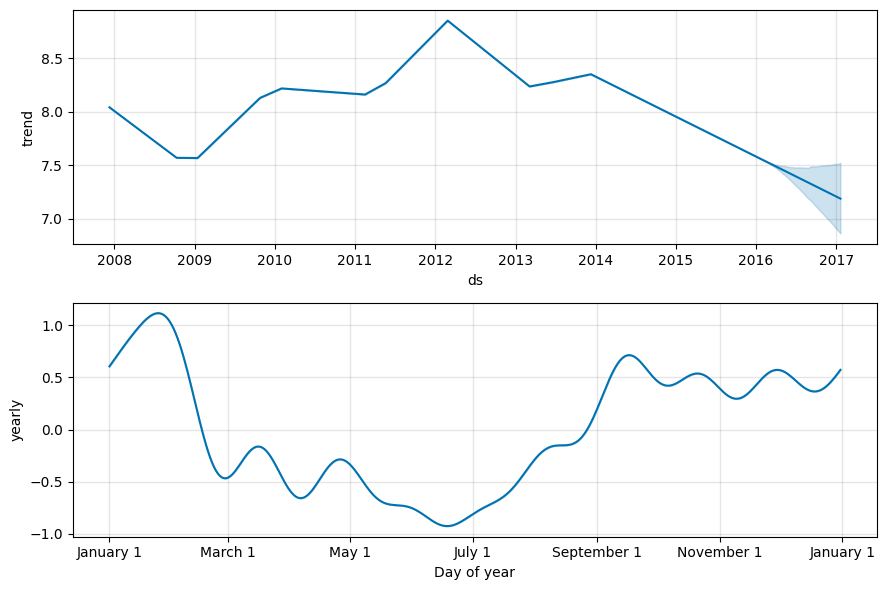

In [4]:
# add monthly seasonality option (custom)
# fourier order: weekly(2), annaul(10)
# seasonality must be added prior to model fitting.
model = Prophet(weekly_seasonality=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forcast = model.fit(df).predict(future)
fig = model.plot_components(forecast)

- we can also holidays argument which can capture intermitten or unexpected change.
- sometimes holidays last a few days or weeks so we can set range by `lower_window` and `upper_window`.  
- if you set `lower_indow=-1`, it means that you consider the holiday and the day before holiday.

21:31:41 - cmdstanpy - INFO - Chain [1] start processing
21:31:42 - cmdstanpy - INFO - Chain [1] done processing


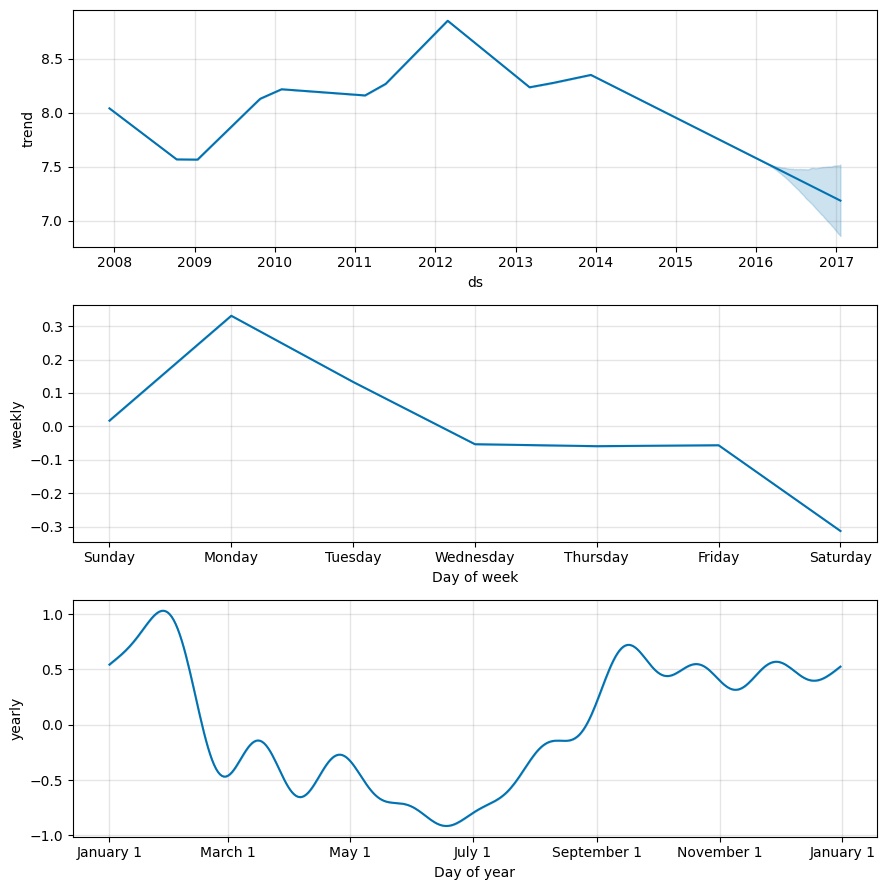

In [5]:
# add holidays
holidays = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})

model = Prophet(holidays=holidays)
forcast = model.fit(df).predict(future)
fig = model.plot_components(forecast) 